Run the cell below if you need to install the `mplEasyAnimate` package. The [mplEasyAnimate](https://github.com/tboudreaux/mpl_animate) package was created by HPU alumnus Thomas Boudreaux.

In [ ]:
!pip install mplEasyAnimate

# Conway's Game of Life

## Resources

- [Wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life)
- [Seeds](http://www.eng.utoledo.edu/~scline/life/life.html)
- [Python tutorial](https://reasonabledeviations.com/2017/06/10/conway-python/)

## Rules

(Quoted from Wikipedia)

The universe of the Game of Life is an infinite, two-dimensional orthogonal grid of square cells, each of which is in one of two possible states, live or dead, (or populated and unpopulated, respectively). Every cell interacts with its eight neighbours, which are the cells that are horizontally, vertically, or diagonally adjacent. At each step in time, the following transitions occur:

- Any live cell with fewer than two live neighbours dies, as if by underpopulation.
- Any live cell with two or three live neighbours lives on to the next generation.
- Any live cell with more than three live neighbours dies, as if by overpopulation.
- Any dead cell with exactly three live neighbours becomes a live cell, as if by reproduction.

These rules, which compare the behavior of the automaton to real life, can be condensed into the following:

- Any live cell with two or three live neighbours survives.
- Any dead cell with three live neighbours becomes a live cell.
- All other live cells die in the next generation. Similarly, all other dead cells stay dead.

The initial pattern constitutes the seed of the system. The first generation is created by applying the above rules simultaneously to every cell in the seed; births and deaths occur simultaneously, and the discrete moment at which this happens is sometimes called a tick. Each generation is a pure function of the preceding one. The rules continue to be applied repeatedly to create further generations.

## Program

The following program is inspired by [Robert Andrew Martin's blog post at reasonabledeviations.com](https://reasonabledeviations.com/2017/06/10/conway-python/).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import random as rand

## the packages below are used to create an animation as a mp4 file and display it in the notebook
from IPython.display import HTML
from mplEasyAnimate import animation
from tqdm import tqdm
from base64 import b64encode

# Create Grid and Seed

In [2]:
# create cellular automata
# 2D array

n = 6 #number of cells in a row
automata = np.zeros((n, n), dtype=int)

seed = [[1,1,0,0],
          [1,1,0,0],
          [0,0,1,1],
          [0,0,1,1]]

automata[1:5,1:5] = seed

print(automata)

[[0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 1 0 0 0]
 [0 0 0 1 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


## Visualize Grid

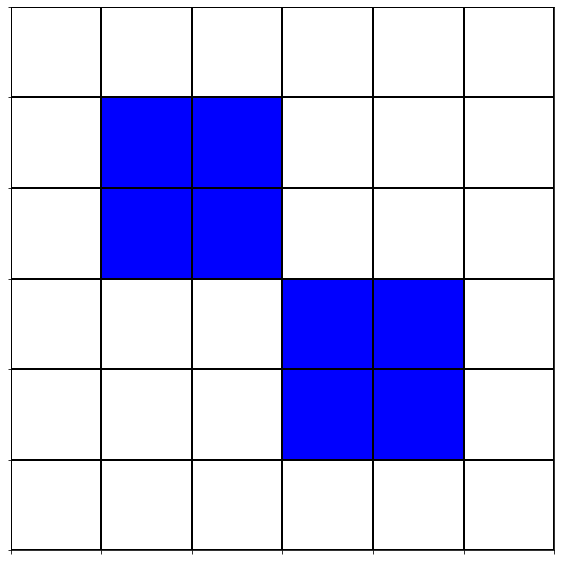

In [3]:
cmap = colors.ListedColormap(['white', 'blue'])
bounds = [0, 1, 1]
norm = colors.BoundaryNorm(bounds, cmap.N)

fig = plt.figure(figsize=(10,10))

frame = plt.gca()
frame.axes.set_xticks(np.arange(-0.5, n+0.5, 1))
frame.axes.set_yticks(np.arange(-0.5, n+0.5, 1))
frame.set_yticklabels([])
frame.set_xticklabels([])
frame.axes.grid(True, which='major', axis='both', color='k', linestyle='-', linewidth=2)

plt.imshow(automata, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')


## Determine Cell Survival

In [4]:
# Create an identical copy of the universe, which will be the next generation.
future_automata = np.copy(automata)

def applyrules(x, y):
    global future_automata
    nrows = automata.shape[0]
    ncols = automata.shape[1]
    
    aBC = np.zeros((nrows+2, ncols+2))
    aBC[1:nrows+1, 1:nrows+1] = automata[:,:]
    aBC[0,1:-1] = aBC[-2,1:-1] #top row, not corners
    aBC[-1,1:-1] = aBC[1,1:-1] #bottom row, not corners
    aBC[1:-1,0] = aBC[1:-1,-2] #first column, not corners
    aBC[1:-1,-1] = aBC[1:-1, 1] #last column, not corners
    
    aBC[0,0] = aBC[-2,-2] #top left corner
    aBC[-1,0] = aBC[1,-2] #bottom left corner
    aBC[0,-1] = aBC[-2,1]#top right corner
    aBC[-1,-1] = aBC[1,1] #bottom right corner
    
    #shift x and y for aBC.
    x = x+1
    y = y+1
    
    #find number of living neighbors by sum of 8 surrounding squares. Don't count the center neighbor.
    num_living = np.sum(aBC[x - 1:x + 2, y - 1:y + 2]) - aBC[x, y]

    # If the cell is alive
    if aBC[x, y] == 1:
        if num_living < 2 or num_living > 3:
            future_automata[x-1, y-1] = 0 #cell dies, use unshifted (original) x, y.

    # If the cell is dead
    elif aBC[x, y] == 0:
        if num_living == 3:
            future_automata[x-1, y-1] = 1 #cell is born


## Iterate

In [5]:
def evolve():
    global automata

    # apply rules to each cell
    for i in range(automata.shape[0]):
        for j in range(automata.shape[1]):
            applyrules(i, j)

    # Set universe to be equal to new_universe.
    automata = np.copy(future_automata)
    
evolve()
print(automata)

[[0 0 0 0 0 0]
 [0 1 1 0 0 0]
 [0 1 0 0 0 0]
 [0 0 0 0 1 0]
 [0 0 0 1 1 0]
 [0 0 0 0 0 0]]


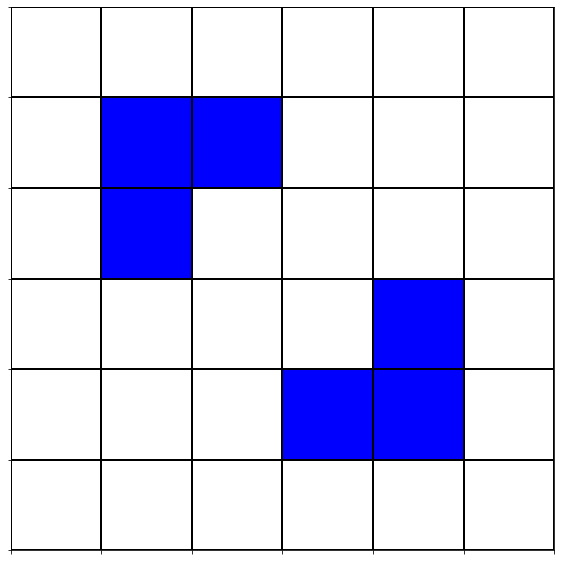

In [6]:
fig = plt.figure(figsize=(10,10))

frame = plt.gca()
frame.axes.set_xticks(np.arange(-0.5, n+0.5, 1))
frame.axes.set_yticks(np.arange(-0.5, n+0.5, 1))
frame.set_yticklabels([])
frame.set_xticklabels([])
frame.axes.grid(True, which='major', axis='both', color='k', linestyle='-', linewidth=2)

plt.imshow(automata, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')

## Put it all together

Here are all the functions we will need.


In [7]:
# Apply rules to one cell
def applyrules(x, y):
    global future_automata
    nrows = automata.shape[0]
    ncols = automata.shape[1]
    
    aBC = np.zeros((nrows+2, ncols+2))
    aBC[1:nrows+1, 1:nrows+1] = automata[:,:]
    aBC[0,1:-1] = aBC[-2,1:-1] #top row, not corners
    aBC[-1,1:-1] = aBC[1,1:-1] #bottom row, not corners
    aBC[1:-1,0] = aBC[1:-1,-2] #first column, not corners
    aBC[1:-1,-1] = aBC[1:-1, 1] #last column, not corners
    
    aBC[0,0] = aBC[-2,-2] #top left corner
    aBC[-1,0] = aBC[1,-2] #bottom left corner
    aBC[0,-1] = aBC[-2,1]#top right corner
    aBC[-1,-1] = aBC[1,1] #bottom right corner
    
    #shift x and y for aBC.
    x = x+1
    y = y+1
    
    #find number of living neighbors by sum of 8 surrounding squares. Don't count the center neighbor.
    num_living = np.sum(aBC[x - 1:x + 2, y - 1:y + 2]) - aBC[x, y]

    # If the cell is alive
    if aBC[x, y] == 1:
        if num_living < 2 or num_living > 3:
            future_automata[x-1, y-1] = 0 #cell dies, use unshifted (original) x, y.

    # If the cell is dead
    elif aBC[x, y] == 0:
        if num_living == 3:
            future_automata[x-1, y-1] = 1 #cell is born

# Iterate over all cells and update the automata
def iterate():
    global automata

    # apply rules to each cell
    for i in range(automata.shape[0]):
        for j in range(automata.shape[1]):
            applyrules(i, j)

    # Set universe to be equal to new_universe.
    automata = np.copy(future_automata)

# Display grid    
def showAutomata():
    cmap = colors.ListedColormap(['white', 'blue'])
    bounds = [0, 1, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)
    fig = plt.figure(figsize=(10,10))
    ax = plt.gca()
    ax.set_xticks(np.arange(-0.5, n+0.5, 1))
    ax.set_yticks(np.arange(-0.5, n+0.5, 1))
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.grid(True, which='major', axis='both', color='k', linestyle='-', linewidth=2)

    plt.imshow(automata, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')

# Create an animation
def animAutomata(filename, N):
    global automata
    cmap = colors.ListedColormap(['white', 'blue'])
    bounds = [0, 1, 1]
    norm = colors.BoundaryNorm(bounds, cmap.N)

    with animation(filename, dpi=30) as anim:
        t_offsets = np.arange(Niterations+1)
        i=0
        for offset in tqdm(t_offsets):

            #iterate the automata
            if i>0:
                iterate()

            fig = plt.figure(figsize=(10,10))
            ax = fig.gca()
            ax.set_xticks(np.arange(-0.5, n+0.5, 1))
            ax.set_yticks(np.arange(-0.5, n+0.5, 1))
            ax.set_yticklabels([])
            ax.set_xticklabels([])
            ax.grid(True, which='major', axis='both', color='k', linestyle='-', linewidth=2)
            plt.imshow(automata, interpolation='nearest', cmap=cmap, norm=norm, aspect='equal')
            anim.add_frame(fig)
            plt.close(fig)
            i=i+1

The programs below will use the functions iterate the automata. You should specify:

- the number of cells in a row
- the seed
- the number of iterations

## The Beacon

This program shows each iteration.

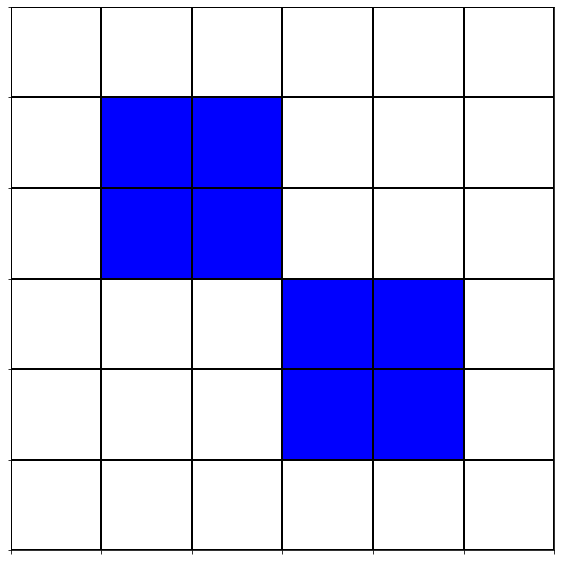

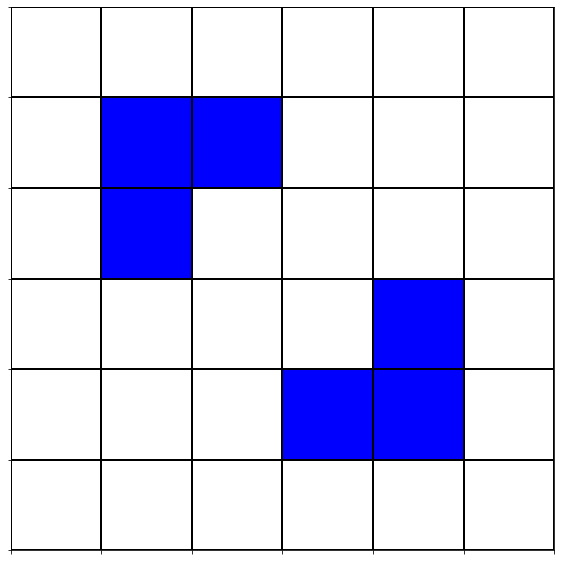

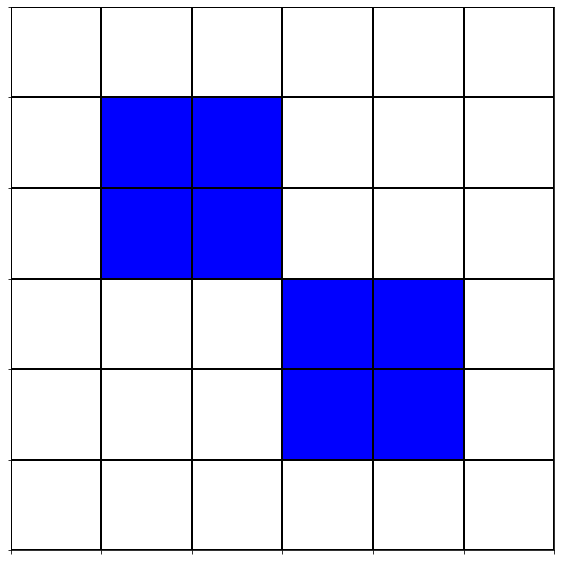

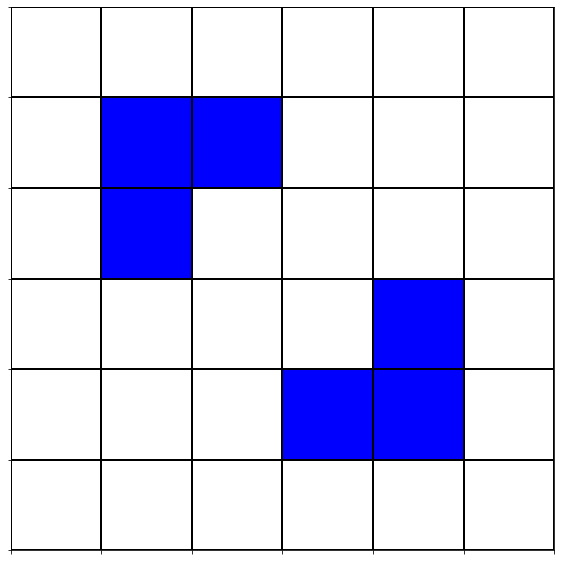

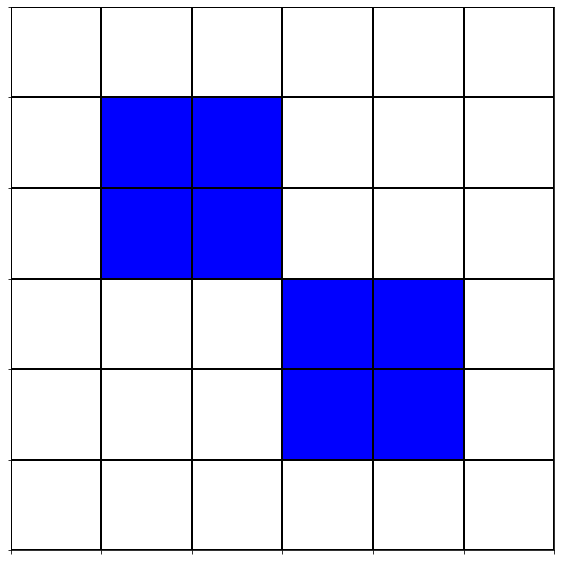

In [8]:
#number of cells in a row
n = 6 

# Number of iterations of evolution
Niterations = 4

#seed
seed = [[1,1,0,0],
          [1,1,0,0],
          [0,0,1,1],
          [0,0,1,1]]

#create automata
automata = np.zeros((n, n), dtype=int)
automata[1:np.shape(seed)[0]+1,1:np.shape(seed)[1]+1] = seed

# Create an identical copy of the automata, which will be the next iteration of the automata after one time step.
future_automata = np.copy(automata)

# Show iterations of automata
showAutomata()
for i in range(Niterations):
    iterate()
    showAutomata()


This program creates an animation.

In [9]:
#number of cells in a row
n = 6 

# Number of iterations of evolution
Niterations = 10

#seed
seed = [[1,1,0,0],
          [1,1,0,0],
          [0,0,1,1],
          [0,0,1,1]]

#create automata
automata = np.zeros((n, n), dtype=int)
automata[1:np.shape(seed)[0]+1,1:np.shape(seed)[1]+1] = seed

# Create an identical copy of the automata, which will be the next iteration of the automata after one time step.
future_automata = np.copy(automata)

# Show iterations of automata
# showAutomata()
# for i in range(Niterations):
#     iterate()
#     showAutomata()

#create animation
filename = 'beacon.mp4'
animAutomata(filename, Niterations)

#display animation
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


100%|██████████| 11/11 [00:01<00:00,  5.85it/s]


## Spaceship

In [11]:
#number of cells in a row
n = 20

# Number of iterations of evolution
Niterations = 20

#seed
seed = [[1,0,0,1,0],
          [0,0,0,0,1],
          [1,0,0,0,1],
          [0,1,1,1,1]]

#create automata
automata = np.zeros((n, n), dtype=int)
automata[3:np.shape(seed)[0]+3,3:np.shape(seed)[1]+3] = seed

# Create an identical copy of the automata, which will be the next iteration of the automata after one time step.
future_automata = np.copy(automata)

# Show iterations of automata
# showAutomata()
# for i in range(Niterations):
#     iterate()
#     showAutomata()

#create animation
filename = 'glider.mp4'
animAutomata(filename, Niterations)

#display animation
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


100%|██████████| 21/21 [00:04<00:00,  4.65it/s]


## Boundary Conditions

There are various ways of dealing with cells at the boundary. Rules applied to cells at the boundary are called **boundary conditions**, as described in this [blog post](https://beltoforion.de/en/game_of_life/index.php). At that blog post, you can experiment with these different boundary conditions to see the effect.

In our notebook, I've implemented periodic boundary conditions where the cells "wrap".

## Random Automata

In [12]:
#number of cells in a row
n = 40

# Number of iterations of evolution
Niterations = 200

#seed
seed = np.random.randint(2, size=(n, n))

#create automata
automata = np.zeros((n, n), dtype=int)
automata = np.copy(seed)

# Create an identical copy of the automata, which will be the next iteration of the automata after one time step.
future_automata = np.copy(automata)

# Show iterations of automata
# showAutomata()
# for i in range(Niterations):
#     iterate()
#     showAutomata()

#create animation
filename = 'random.mp4'
animAutomata(filename, Niterations)

#display animation
mp4 = open(filename,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)


100%|██████████| 201/201 [01:00<00:00,  3.32it/s]


## Exercises

View a collection of patterns at [Wikipedia](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life). You may find others by simply searching for other sites.

1. Create all of the oscillators (other than the Beacon, which we already created).
2. Create the Glider.
3. Create the Gosper Gun.